In [68]:
%run init.ipy

from lib import constants

Exception: File `'init.ipy.py'` not found.

## Get some test data from VTRFormants ***TEST*** set

In [69]:
import random
from vtr.prior import formant
from lib import timit

def rand_triple():
    vtr_root = timit.test_set(timit.VTRFORMANTS)
    timit_root = timit.test_set(timit.TIMIT)
    l = list(timit.yield_file_triples(vtr_root, timit_root))
    return random.choice(l)

fb_file, phn_file, wav_file = rand_triple()

In [70]:
d, fs = formant.read_wav_file_and_normalize(wav_file)
t = np.arange(len(d))/fs

from lib import klatt
klatt.play(t*1000., d)

**********ao**********


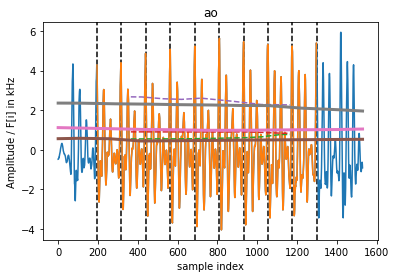

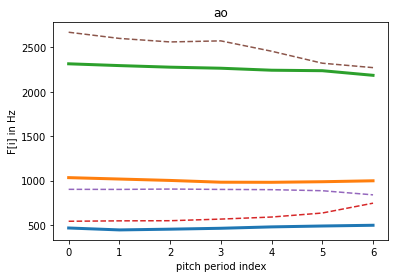

**********iy**********


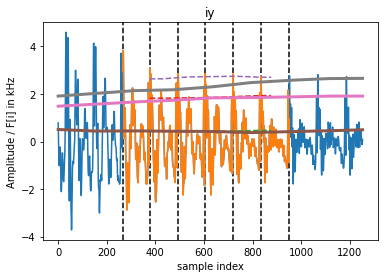

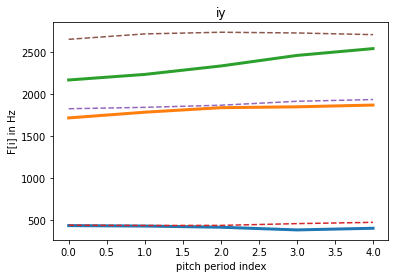

**********ih**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR2/MWEW0/SX281.WAV: Discarding vowel `ix` segment at sample indices 7268:8146: Praat gave only 2 < 3 valid formants
  warnings.warn(


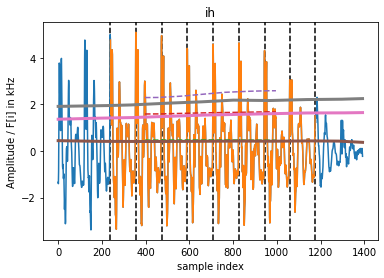

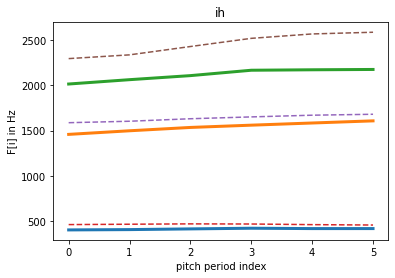

**********ey**********


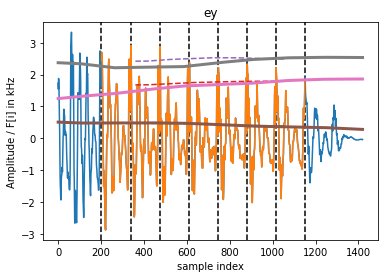

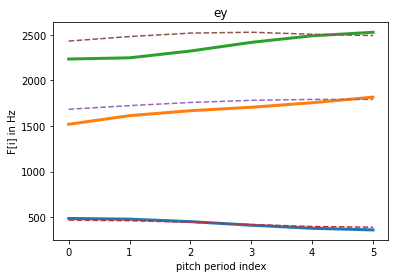

**********ae**********


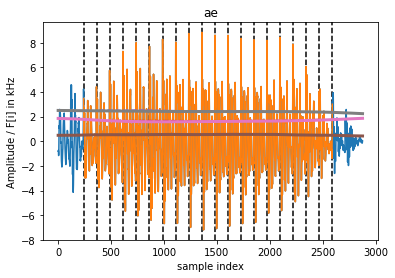

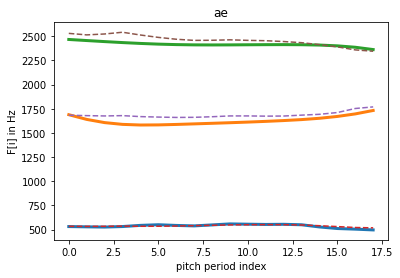

**********iy**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR2/MWEW0/SX281.WAV: Discarding vowel `ix` segment at sample indices 25107:25483: segment too short for Praat's pulse estimation algorithm: To analyse this Sound, “minimum pitch” must not be less than 127.65957446808511 Hz.
Sound: pitch analysis not performed.
  warnings.warn(


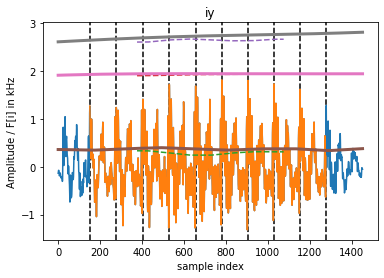

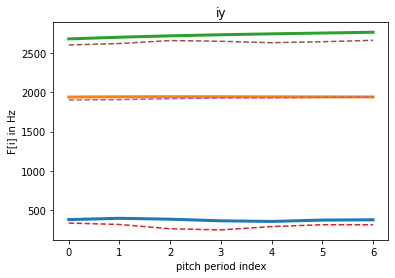

**********ao**********


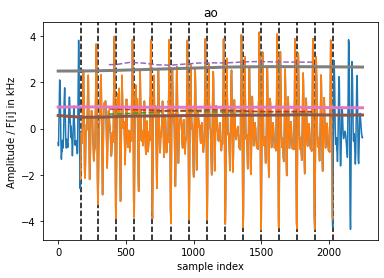

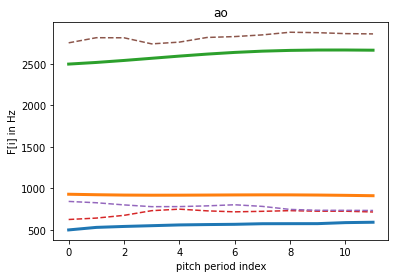

**********aw**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR2/MWEW0/SX281.WAV: Discarding vowel `axr` segment at sample indices 37760:39853: Estimated Praat periods not within `{min|max}_period_length_msec`: [2.4375 2.3125 8.5    2.5    2.     2.3125 2.625  2.375  2.3125 2.4375
 5.625  2.8125 2.4375 2.5    3.0625 2.4375 2.     2.25   2.5    2.5
 1.9375 2.375  2.4375 2.4375 1.9375 2.4375 2.4375 2.3125 1.9375 2.375
 2.4375 2.3125 1.6875 4.5    1.875  1.6875 2.25   1.875  1.875  1.875 ]
  warnings.warn(


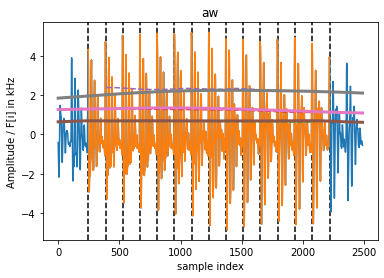

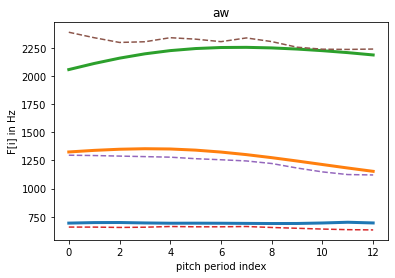

**********axr**********


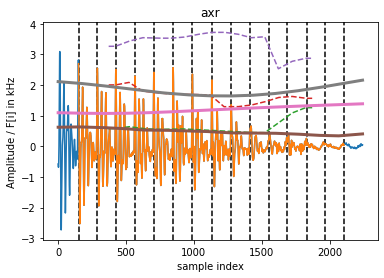

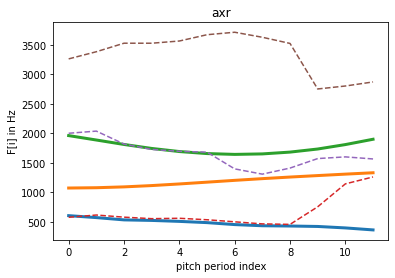

In [71]:
from lib import constants

for T_praat, F_true_periods, F_praat_periods, context in formant.yield_training_data(
        fb_file, phn_file, wav_file, return_full=True
    ):
    vowel = context['vowel']
    print("*"*10 + vowel + "*"*10)
    
    # Plot pulse estimates
    pulse_idx = context['pulse_idx']
    for pi in pulse_idx:
        axvline(pi, ls="--", color="black")
    first, last = pulse_idx[0], pulse_idx[-1]
    
    # Plot waveform
    segment = context['segment']
    plot(segment)
    plot(range(first, last), segment[first:last])
    
    # Plot formant tracks
    plot(context['F_praat_tracks']/1000, "--")
    plot(context['F_true_tracks']/1000, lw=3)
    ylabel("Amplitude / F[i] in kHz")
    xlabel("sample index")
    title(vowel)
    show()
    
    # Plot the distilled training data
    plot(F_true_periods, lw=3)
    plot(F_praat_periods, "--")
    ylabel("F[i] in Hz")
    xlabel("pitch period index")
    title(vowel)
    show()

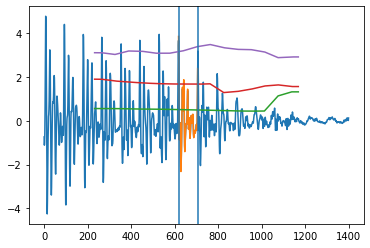

{'fulldata': array([-0.73575661, -1.11368963, -0.96834592, ...,  0.09122438,
         0.01198931,  0.12447942]),
 'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.398e+02, 1.399e+02,
        1.400e+02]),
 'fs': 10000.0,
 'd': array([ 3.84200781e+00,  2.87930898e+00,  1.14961692e+00, -3.06229823e-01,
        -8.83281127e-01, -5.75816888e-01, -8.74959795e-02, -1.10641775e-01,
        -6.45584133e-01, -1.53133745e+00, -2.20943729e+00, -2.31629629e+00,
        -2.07844352e+00, -1.62373289e+00, -1.02610071e+00, -2.81203544e-01,
         5.94712356e-01,  1.27765669e+00,  1.52540161e+00,  1.26132901e+00,
         7.06961816e-01,  4.53280146e-01,  7.89292325e-01,  1.44105159e+00,
         1.87189923e+00,  1.66243007e+00,  7.64103883e-01, -3.65291537e-01,
        -1.17961103e+00, -1.41098148e+00, -1.21422375e+00, -9.20555751e-01,
        -6.56182872e-01, -4.52066444e-01, -3.23082619e-01, -1.91718270e-01,
        -1.21386043e-01, -1.70879404e-01, -1.38638804e-01,  1.15017722e-01,
        

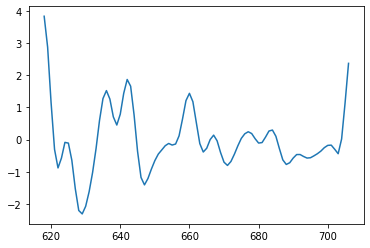

In [72]:
from inv.process import *

ret, c = process_data(
    segment, constants.TIMIT_FS_HZ, prepend=0, max_NP=1, return_full=True
)

plot(c['fulldata'])
plot(range(c['first'], c['last']), c['d'])
plot(c['reference_tracks']/1000)
for idx in c['pulse_estimate']: axvline(idx)
show()
plot(range(c['first'], c['last']), c['d'])
ret

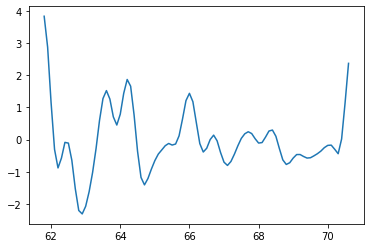

In [73]:
plot(ret['t'], ret['d'])

## Test prior bijector

Test the noise sigma prior (bijector). We put a mean at -20 dB and floor it at the noise floor. Relative uncertainty is 100% leading to a nois power dB of roughly -20 +/- 7.5 dB.

(-21.099202312455258, 7.497420302839404)

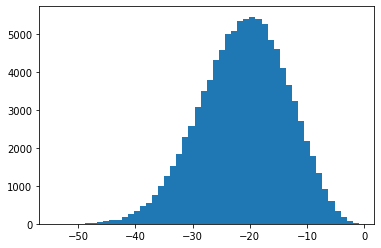

In [74]:
from inv import model

b = model.noise_sigma_bijector()

noise_sigmas = b.forward(randn(100000))

noise_power_dbs = 20*np.log10(noise_sigmas)

hist(noise_power_dbs, bins=50);

np.mean(noise_power_dbs), np.std(noise_power_dbs)

In [75]:
hyper = dict(
    meta = dict(
        noiseless_estimates = False,
        c = constants.BOUNDARY_FACTOR,
        rho = .5, # Peak picking
        inference_method = "nested_sampling",
        inference_method_options = {}
    ),
    data = ret,
    source = next(source._yield_all_configs()),
    filter = filter.AP(10, numpy_backend=jax.numpy, scipy_backend=jax.scipy)
)

hyper['source']['kernel_M'] = 64
hyper['source']['use_oq'] = True

model.ndim(hyper), len(hyper['data']['d'])

(26, 89)

In [76]:
hyper

{'meta': {'noiseless_estimates': False,
  'c': 2.0,
  'rho': 0.5,
  'inference_method': 'nested_sampling',
  'inference_method_options': {}},
 'data': {'fulldata': array([-0.73575661, -1.11368963, -0.96834592, ...,  0.09122438,
          0.01198931,  0.12447942]),
  'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.398e+02, 1.399e+02,
         1.400e+02]),
  'fs': 10000.0,
  'd': array([ 3.84200781e+00,  2.87930898e+00,  1.14961692e+00, -3.06229823e-01,
         -8.83281127e-01, -5.75816888e-01, -8.74959795e-02, -1.10641775e-01,
         -6.45584133e-01, -1.53133745e+00, -2.20943729e+00, -2.31629629e+00,
         -2.07844352e+00, -1.62373289e+00, -1.02610071e+00, -2.81203544e-01,
          5.94712356e-01,  1.27765669e+00,  1.52540161e+00,  1.26132901e+00,
          7.06961816e-01,  4.53280146e-01,  7.89292325e-01,  1.44105159e+00,
          1.87189923e+00,  1.66243007e+00,  7.64103883e-01, -3.65291537e-01,
         -1.17961103e+00, -1.41098148e+00, -1.21422375e+00, -9.20555751e-0

In [77]:
w = randn(model.ndim(hyper))

b = model.theta_trajectory_bijector(hyper)

b.forward(w)

[Memory]48866.0s, 814.4min: Loading posterior_of_fitted_lf_values...
[Memory]48866.0s, 814.4min: Loading run_nested...
[Memory]48866.1s, 814.4min: Loading posterior_of_fitted_TFB_values...
[Memory]48866.1s, 814.4min: Loading run_nested...
[Memory]48866.1s, 814.4min: Loading get_vtrformants_training_data...
[Memory]48867.2s, 814.5min: Loading run_nested...
[Memory]48868.0s, 814.5min: Loading run_nested...
[Memory]48868.9s, 814.5min: Loading run_nested...
[Memory]48869.8s, 814.5min: Loading run_nested...
[Memory]48869.8s, 814.5min: Loading get_vtrformants_training_data...


{'noise_sigma': DeviceArray([0.12949475], dtype=float64),
 'source': DeviceArray([[1.043991  , 0.03989986, 8.85383976, 0.42633897]], dtype=float64),
 'filter': DeviceArray([[ 297.86191393,  503.04800481,  688.47682097,  832.89254158,
               1110.41926595, 1494.58969231, 1946.92318962, 2040.48061689,
               2474.73356458, 2551.51891148,  103.33648661,  222.36872067,
                387.35598191, 1228.50536302,  443.97963296, 1861.5914156 ,
               1279.10079772,  167.68418118, 2015.80998593,  511.75106876]],            dtype=float64),
 'g': DeviceArray([[2.60324661]], dtype=float64)}

In [78]:
-b.forward_log_det_jacobian(w)

DeviceArray(-112.51779871, dtype=float64)

In [79]:
prior = model.theta_trajectory_prior(hyper)
theta = prior.sample(seed=jaxkey())
theta, prior.log_prob(theta)

[Memory]48871.3s, 814.5min: Loading posterior_of_fitted_lf_values...
[Memory]48871.3s, 814.5min: Loading run_nested...
[Memory]48871.3s, 814.5min: Loading posterior_of_fitted_TFB_values...
[Memory]48871.3s, 814.5min: Loading run_nested...


({'noise_sigma': DeviceArray([0.17426061], dtype=float64),
  'source': DeviceArray([[1.80955553, 1.99185765, 8.36046531, 0.84456859]], dtype=float64),
  'filter': DeviceArray([[ 208.29299395,  302.94617977,  505.12089684,  676.96445411,
                1125.63473725, 1746.10558258, 2082.96407921, 2439.24692829,
                2758.98810195, 3086.85648081,  120.87764576, 4300.70073781,
                  60.36960599,  760.3068584 ,  291.32146404, 1154.6342816 ,
                 496.64594251,  774.35107434,  222.58948802, 4209.0229657 ]],            dtype=float64),
  'g': DeviceArray([[0.09429582]], dtype=float64)},
 DeviceArray(-147.20624648, dtype=float64))

In [80]:
# test vmap: works
def test(theta, offset):
    return model.pole_coefficients(theta, hyper)

in_axes = {
    'noise_sigma': None,
    'source': 0,
    'filter': 0,
    'g': 0
}

# DONT USE THIS; just a dummy example
offset = np.cumsum(theta['source'][:,2])

jax.jit(jax.vmap(test, in_axes=(in_axes, 0)))(theta, offset)

(DeviceArray([[  -379.74832391 +1308.74347917j,
               -13511.0498432  +1903.46698561j,
                 -189.65671068 +3173.76819737j,
                -2388.57444083 +4253.49311157j,
                 -915.21337127 +7072.57164236j,
                -3627.39057667+10971.10494127j,
                -1560.25924441+13087.64929786j,
                -2432.69564643+15326.24046043j,
                 -699.28550034+17335.23350486j,
               -13223.03562782+19395.29128558j]], dtype=complex128),
 DeviceArray([[-3.10407934e-02-4.65796789e-02j,
                1.15153534e-05+6.52850435e-07j,
                3.25880398e-02-4.61014878e-03j,
               -5.13791731e-03+2.15244411e-02j,
                3.41801344e-03-7.74880560e-04j,
                3.18051321e-05+3.97799603e-04j,
                1.30229177e-04-7.46084624e-05j,
               -2.51057313e-06+2.63085239e-05j,
                1.62240668e-06+4.95536742e-07j,
               -4.03414823e-09-2.51575314e-09j]], dtype=complex128)

In [81]:
jax.vmap(model.model_basis_functions, in_axes=(in_axes,None))(theta, hyper)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marnix/thesis/py/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_270062/1047077500.py", line 1, in <cell line: 1>
    jax.vmap(model.model_basis_functions, in_axes=(in_axes,None))(theta, hyper)
  File "/home/marnix/thesis/py/venv/lib/python3.10/site-packages/jax/_src/traceback_util.py", line 162, in reraise_with_filtered_traceback
    return fun(*args, **kwargs)
  File "/home/marnix/thesis/py/venv/lib/python3.10/site-packages/jax/_src/api.py", line 1666, in vmap_f
    out_flat = batching.batch(
  File "/home/marnix/thesis/py/venv/lib/python3.10/site-packages/jax/linear_util.py", line 168, in call_wrapped
    ans = self.f(*args, **dict(self.params, **kwargs))
  File "/home/marnix/thesis/py/inv/model.py", line 128, in model_basis_functions
    return c
NameError: name 'c' is not defined

During handling of the above exce

In [ ]:
xy = theta['filter'][0,:]
x, y = xy.split(2)

g = theta['g'][0,:]

func = hyper['filter'].pole_coefficients

func(x, y, g)

In [ ]:
jax.jit(func)(x, y, g)